9章　ディープラーニング  
3.畳み込みニューラルネットワークによるカラー画像の分類

CIFAR-10のカラー画像を見る

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

# CIFAR-10データセットをロード
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# データの形状を出力
print('X_train:', X_train.shape, 'y_train:', y_train.shape)
print('X_test:', X_test.shape, 'y_test', y_test.shape)


X_train: (50000, 32, 32, 3) y_train: (50000, 1)
X_test: (10000, 32, 32, 3) y_test (10000, 1)


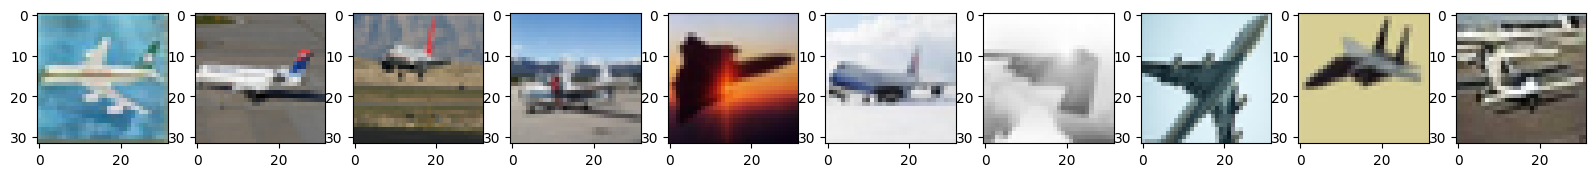

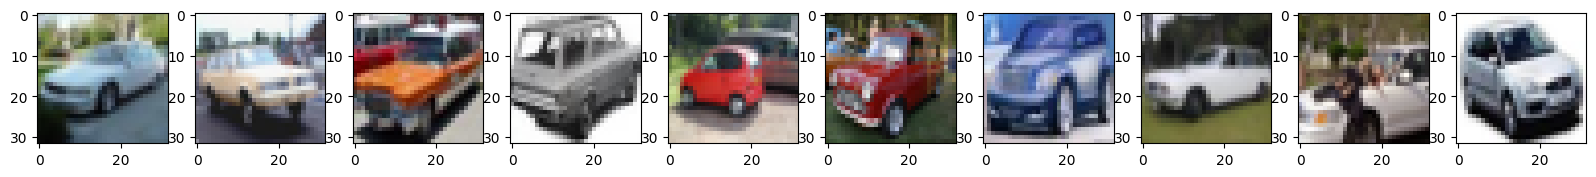

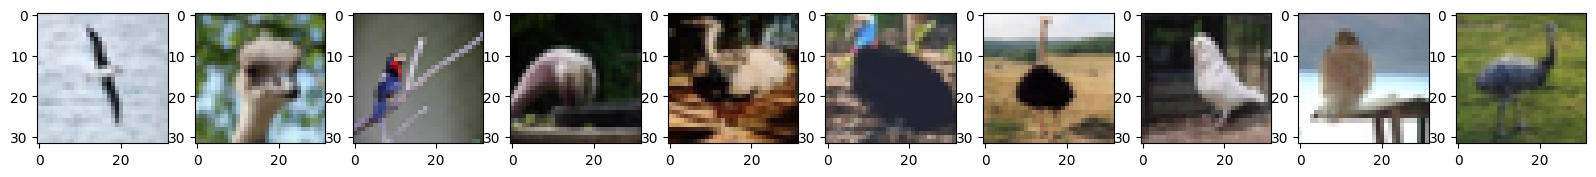

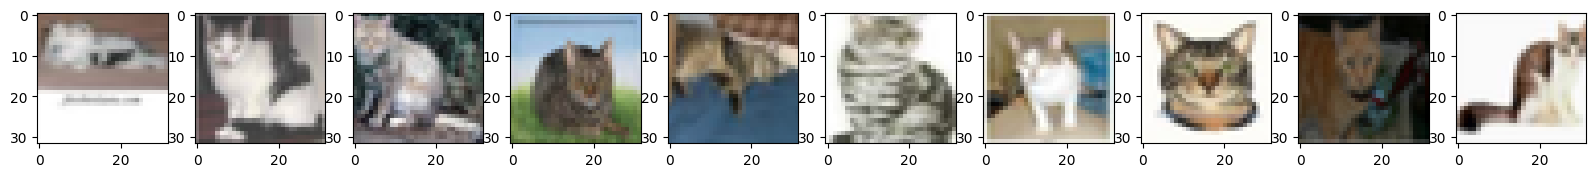

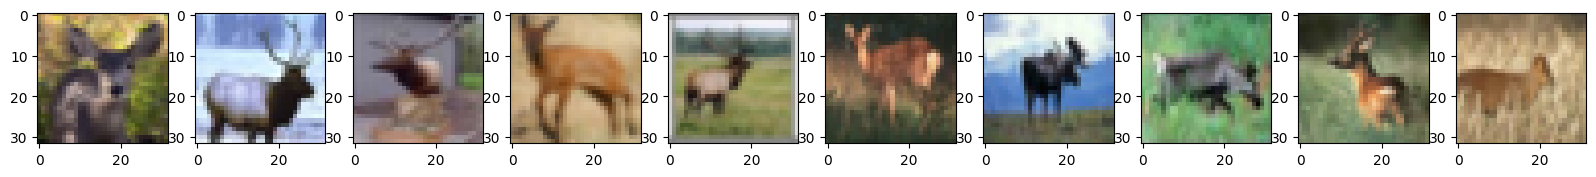

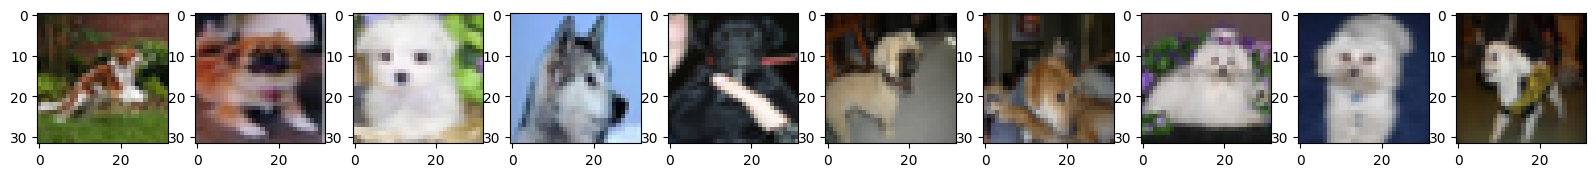

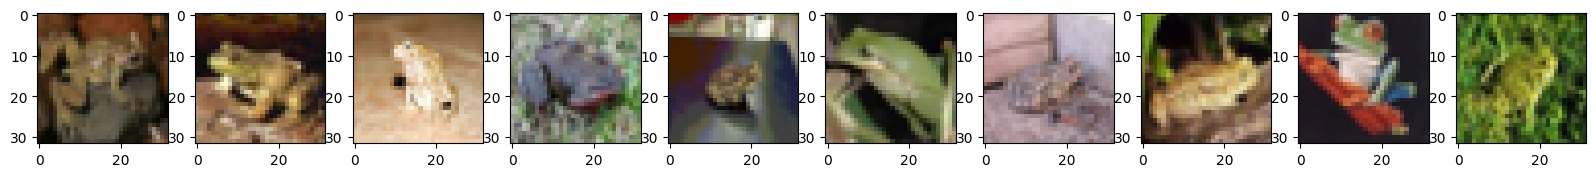

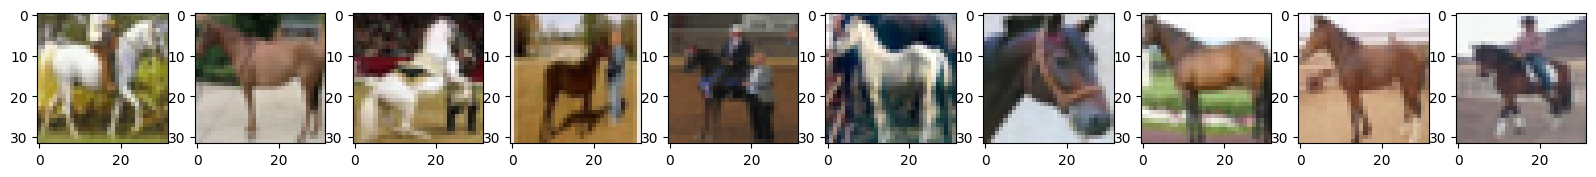

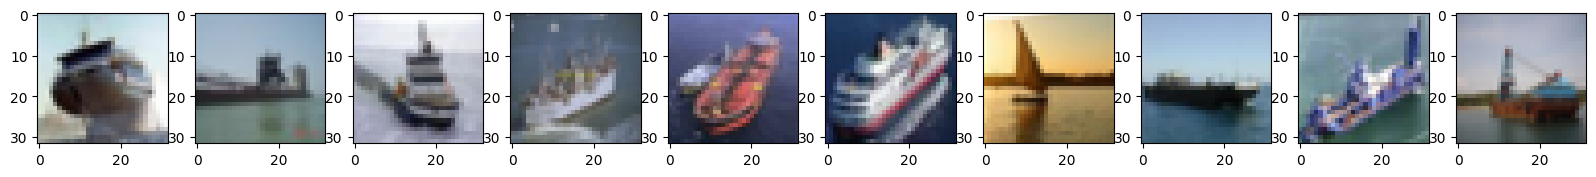

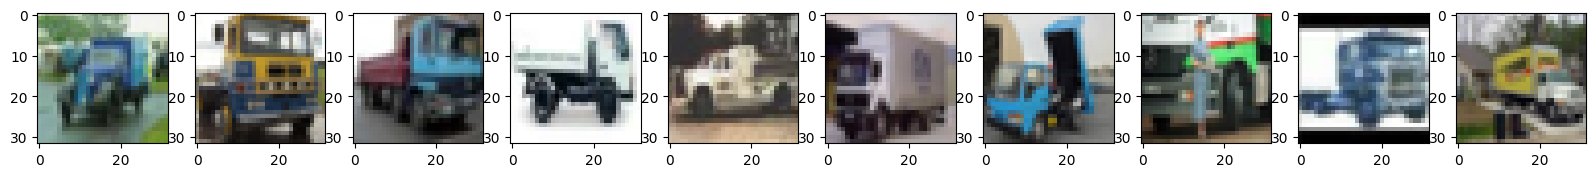

In [ ]:
# 画像を描画
num_classes = 10 # 分類先のクラス数
pos = 1          # 画像の描画位置を保持する変数

# クラスの数だけ繰り返す
for target_class in range(num_classes):
  # 各クラスに分類される画像のインデックスを保持するリスト
  target_idx = []

  # クラスが正解の場合の正解ラベルのインデックスを取得する
  for i in range(len(y_train)):
    # 1行，０列の正解ラベルがtarget_classと一致するか
    if y_train[i][0] == target_class:
      # クラスiが正解であれば，正解ラベルのインデックスをtarget_idxに追加
      target_idx.append(i)

  np.random.shuffle(target_idx) # クラスiの画像のインデックスをシャッフル
  plt.figure(figsize=(20, 20))    # 描画エリアを縦２０インチ，横２０インチにする


  # シャッフルした最初の画像の１０枚を描画
  for idx in target_idx[:10]:
    plt.subplot(10, 10, pos)    # 10行，10列の描画領域のpos番目の位置を指定
    plt.imshow(X_train[idx])     # Matplotlibのimshow（）で画像を描画
    pos += 1

plt.show()

In [ ]:
'''
1. データセットを読み込んで前処理する
'''
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [ ]:
# X_train(ndarray): 訓練データ(50000, 32, 32, 3)
# X_test(ndarray): テストデータ(50000, 32, 32, 3)
# Y_train(ndarray): 訓練データの正解ラベル(50000, )
# Y_test(ndarray): テストデータの正解ラベル(50000, )
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 訓練用とテスト用の画像データを正則化する
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

# 訓練データとテストデータの正解ラベルを10クラスのOne-Hot表現に変換
# y_train: (50000, 10)
# y_test: (50000, 10)
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 [==============================] - 12s 0us/step


In [ ]:
from keras.backend import learning_phase
'''
2. モデルの生成
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D   # convolution layers
from tensorflow.keras import regularizers, optimizers

# 正規化のハイパーパラメーターを設定
weight_decay = 1e-4

# モデルの基礎を生成
model = Sequential()

# 第１層：畳み込み層１：正則化を行う
# バッチサイズ，32, 3, 3 => バッチサイズ, 32, 32, 32
model.add(
    Conv2D(
        filters=32,         # フィルターの数
        kernel_size=(3, 3), # 3x3のフィルターを使用
        input_shape=x_train[0].shape, # 入力データの形状
        padding='same',    # ゼロパディングを行う
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'    # 活性化関数はReLu
    )
)

# 第２層：畳み込み層２：正則化を行う
# バッチサイズ，32, 32, 32 => バッチサイズ, 32, 32, 32
model.add(
    Conv2D(
        filters=32,         # フィルターの数
        kernel_size=(3, 3), # 3x3のフィルターを使用
        padding='same',    # ゼロパディングを行う
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'    # 活性化関数はReLu
    )
)

# 第３層：プーリング層１：ウィンドウサイズは2x2
# バッチサイズ，32, 32, 32 => バッチサイズ, 16, 16, 32
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアプト１：ドロップアプトは20%
model.add(Dropout(0.2))

# 第４層：畳み込み層３：正則化を行う
# バッチサイズ，16, 16, 32 => バッチサイズ, 16, 16, 64
model.add(
    Conv2D(
        filters=64,         # フィルターの数
        kernel_size=(3, 3), # 3x3のフィルターを使用
        padding='same',    # ゼロパディングを行う
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'    # 活性化関数はReLu
    )
)

# 第5層：畳み込み層4：正則化を行う
# バッチサイズ，16, 16, 64 => バッチサイズ, 16, 16, 64
model.add(
    Conv2D(
        filters=64,         # フィルターの数
        kernel_size=(3, 3), # 3x3のフィルターを使用
        padding='same',    # ゼロパディングを行う
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'    # 活性化関数はReLu
    )
)

# 第6層：プーリング層2：ウィンドウサイズは2x2
# バッチサイズ，16, 16, 64 => バッチサイズ, 8, 8, 64
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアプト2：ドロップアプトは30%
model.add(Dropout(0.3))

# 第7層：畳み込み層5：正則化を行う
# バッチサイズ，8 8, 64 => バッチサイズ, 8, 8, 128
model.add(
    Conv2D(
        filters=128,         # フィルターの数
        kernel_size=(3, 3), # 3x3のフィルターを使用
        padding='same',    # ゼロパディングを行う
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'    # 活性化関数はReLu
    )
)

# 第8層：畳み込み層6：正則化を行う
# バッチサイズ，8 8, 128 => バッチサイズ, 8, 8, 128
model.add(
    Conv2D(
        filters=128,         # フィルターの数
        kernel_size=(3, 3), # 3x3のフィルターを使用
        padding='same',    # ゼロパディングを行う
        kernel_regularizer=regularizers.l2(weight_decay),
        activation='relu'    # 活性化関数はReLu
    )
)

# 第9層：プーリング層3：ウィンドウサイズは2x2
# バッチサイズ，8, 8, 128 => バッチサイズ, 4, 4, 128
model.add(MaxPooling2D(pool_size=(2, 2)))
# ドロップアプト3：ドロップアプトは40%
model.add(Dropout(0.4))

# Flatten:４層テンソルから２層テンソルに変換
# バッチサイズ, 4, 4, 128 => バッチサイズ, 2048
model.add(Flatten())

# 第１０層：全結合層
# バッチサイズ, 2048 => バッチサイズ, 128
model.add(
    Dense(
        128,    # ニューロン数は128
        activation='relu' # 活性化関数はReLu
    )
)
# ドロップアウト４：ドロップアウトは40%
model.add(Dropout(0.4))

# 第１１層：出力層
# バッチサイズ, 128 => バッチサイズ, 10
model.add(
    Dense(
        10,        # 出力層のニューロン数
        activation='softmax' # 活性化関数はソフトマックス
    )
)

# Sequentialオブジェクトのコンパイル
model.compile(
    # クロスエントロピー誤差
    loss='categorical_crossentropy',
    # バックプロパゲーションのアルゴリズムにAdamを使用
    # 学習率はデフォルトの0.001
    optimizer=optimizers.Adam(learning_rate=0.001),
    # 学習評価として正解率を指定
    metrics={'accuracy'}
)

# モデルのサマリーを出力
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
'''
3. 学習を行う
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# val_accuracyの改善が５エポック見られなかったら，学習率を減衰する
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',         # 監視対象は検証データの精度
    factor=0.1,                      # 学習率を減衰させる割合
    patience=5,                     # 監視対象のエポック数
    varbose=1,                      # 学習率を下げた時に通知する
    mode='max',                     # 最高値を監視する
    min_lr=0.0001                   # 学習率
)

# ミニバッチのサイズ
batch_size=50

# データジェネレータを生成
# 訓練データ
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,     # 横サイズの0.1の割合でランダムに水平移動
    height_shift_range=0.1,     # 横サイズの0.1の割合でランダムに垂直移動
    rotation_range=10,         # 10度の範囲でランダムに回転させる
    zoom_range=0.1,           # ランダムに拡大
    horizontal_flip=True         # 左右反転
)

# テストデータ
test_datagen = ImageDataGenerator(
    featurewise_center=True,             # テストデータセット全体の平均値を取得
    featurewise_std_normalization=True   # データを標準化する
)

# ジェネレーターで標準化を行う場合は，fit()でデータに適合させる
# 訓練データ
train_datagen.fit(x_train)
# テストデータ
test_datagen.fit(x_test)

# ジェネレーターにミニバッチを適合させる
# 訓練データ
train_generator = train_datagen.flow(
    x_train,   # 訓練データ
    y_train,   # 正解ラベル
    batch_size=batch_size
)

# テストデータ
validation_generator = test_datagen.flow(
    x_test,   # テストデータ
    y_test,   # 正解ラベル
    batch_size=batch_size
)

# 学習回数
epochs = 60

# 学習を行う
history = model.fit(
    train_generator,       # 訓練データ
    epochs=epochs,        # 学習回数
    verbose=1,            # 進捗状況を出力する
    # テストデータのvalidation_generatorを検証に使用する
    validation_data=validation_generator,
    # 学習率減衰をコールバック
    callbacks=[reduce_lr]
)



Epoch 1/60


TypeError: ignored

In [ ]:
'''
4. 損失と精度の推移をグラフにする
'''
import matplotlib.pyplot as plt

# 学習結果(損失)のグラフを描画
plt.plot(
    history.history['loss'],
    marker='.',
    label='loss (Training)'
)
plt.plot(
    history.history['val_loss'],
    marker='_',
    label='loss (Validation)'
)

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 学習結果(精度)のグラフを描画
plt.plot(
    hisotry.history['accuracy'],
    marker='.',
    label='accuracy (Training)'
)
plt.plot(
    hisotry.hisotry['val_accuracy'],
    marker='.',
    label='accuracy (Validation)'
)
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
